In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [40]:
from sklearn import tree

In [41]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [42]:
import pydotplus

In [43]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [44]:
import pydotplus

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
df = pd.read_csv('SoccerLEagues.csv')

In [48]:
df.describe()

,CountryID,Games,HomeWins,HomeDraw,HomeLoss,AwayWins,AwayDraw,AwayLoss,HomeWinRatio,HomeLossRatio,HomeDrawRatio,AwayWinRatio,AwayLossRatio,AwayDrawRatio,TotalPoint,SuccessRate
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.00000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,2.959184,35.863946,8.350340,4.675170,4.906463,4.906463,4.67517,8.350340,0.464442,0.274384,0.261174,0.274194,0.464967,0.260839,49.120748,0.879252
std,1.400304,3.691492,3.339871,2.032512,2.651815,2.796888,2.00211,3.165463,0.176664,0.146540,0.111525,0.154218,0.169506,0.109682,16.114498,0.326112
min,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,34.000000,6.000000,3.000000,3.000000,3.000000,3.00000,6.000000,0.333333,0.157895,0.176471,0.157895,0.357143,0.176471,39.000000,1.000000
50%,3.000000,38.000000,8.000000,5.000000,5.000000,4.000000,5.00000,9.000000,0.428571,0.263158,0.263158,0.250000,0.473684,0.263158,46.000000,1.000000
75%,4.000000,38.000000,10.000000,6.000000,7.000000,6.000000,6.00000,11.000000,0.578947,0.368421,0.333333,0.368421,0.578947,0.315789,58.000000,1.000000
max,5.000000,40.000000,19.000000,10.000000,17.000000,16.000000,11.00000,17.000000,1.000000,1.000000,0.636364,0.842105,1.000000,0.642857,102.000000,1.000000


In [49]:
features = df.drop(['SuccessRate'], axis=1)
target = df[['SuccessRate']]

In [50]:
simple_model = DecisionTreeClassifier(random_state=42)
param_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=10, random_state=42)

In [51]:
def train_and_predict(model, features, target):
    X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))
    (tn, fp, fn, tp) = confusion_matrix(y_test, y_pred).ravel()
    print("confusion matrix")
    print("tn, fp, fn, tp")
    print(tn, fp, fn, tp)

In [52]:
train_and_predict(simple_model, features, target)

accuracy score: 0.91
confusion matrix
tn, fp, fn, tp
19 10 8 158


In [53]:
train_and_predict(param_model, features, target)

accuracy score: 0.94
confusion matrix
tn, fp, fn, tp
20 9 2 164


In [54]:
dot_data = StringIO()
export_graphviz(simple_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)

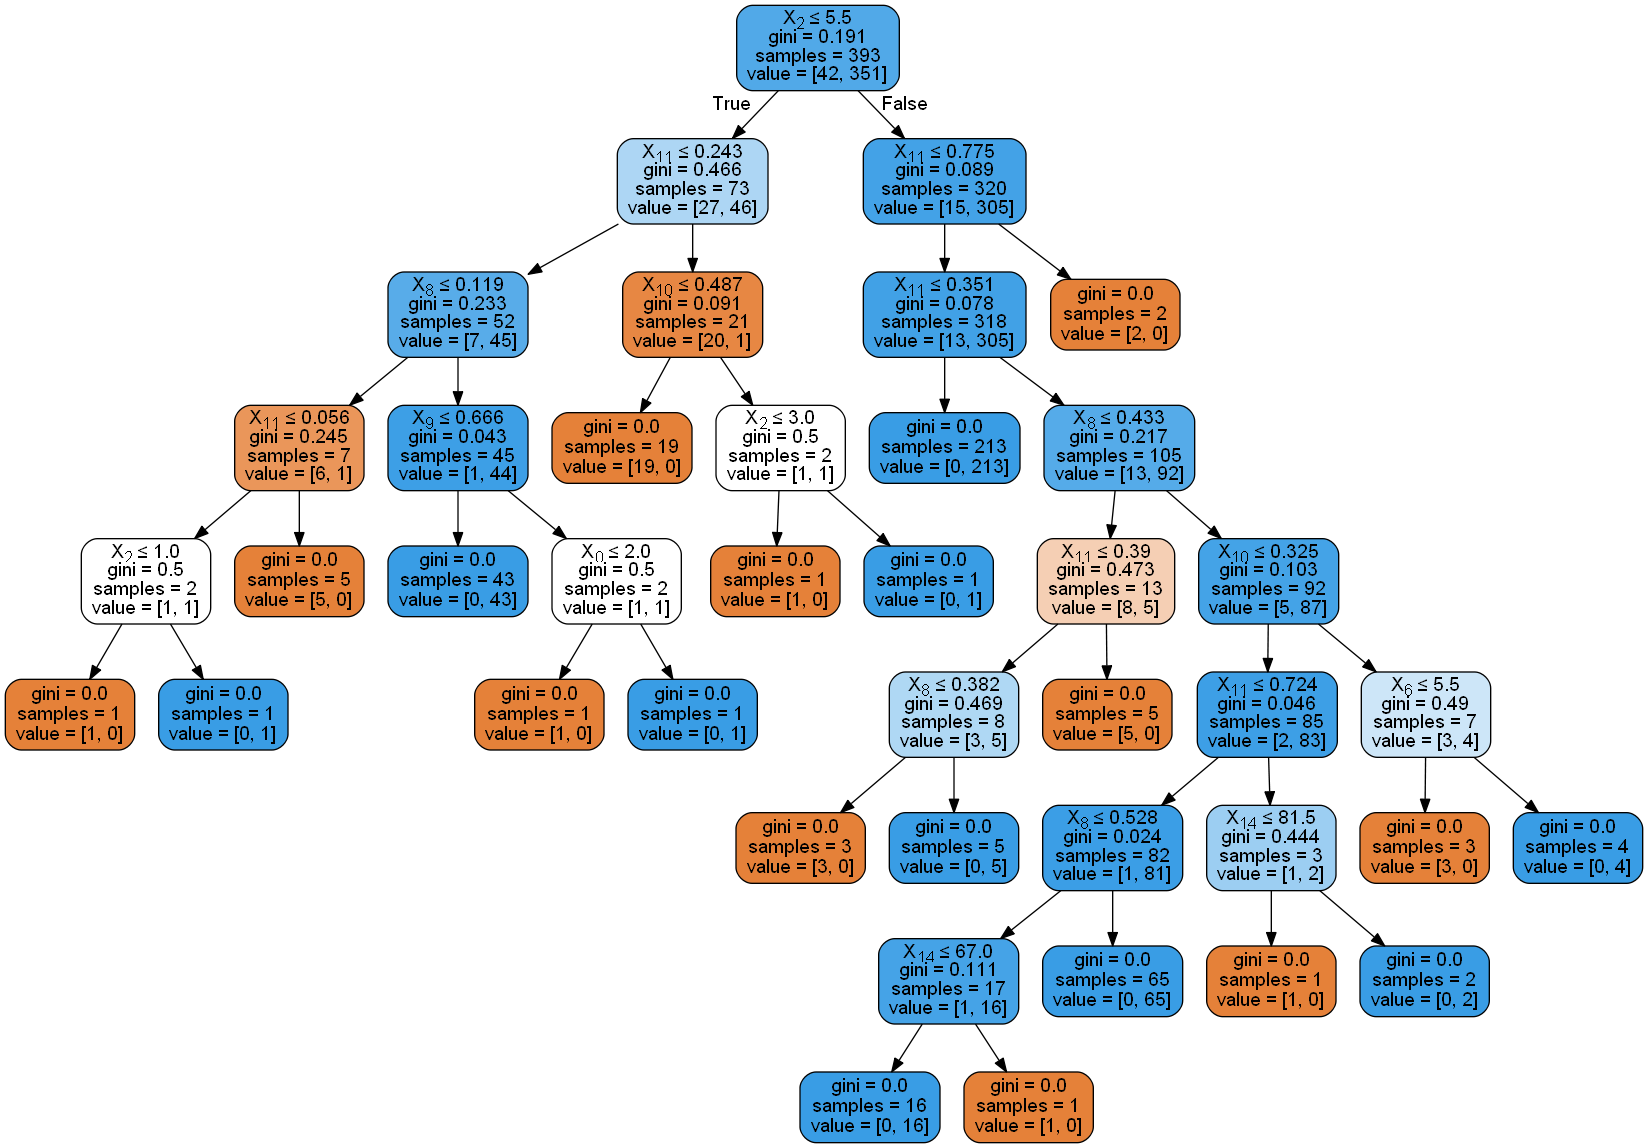

In [55]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [56]:
dot_data = StringIO()
export_graphviz(param_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)

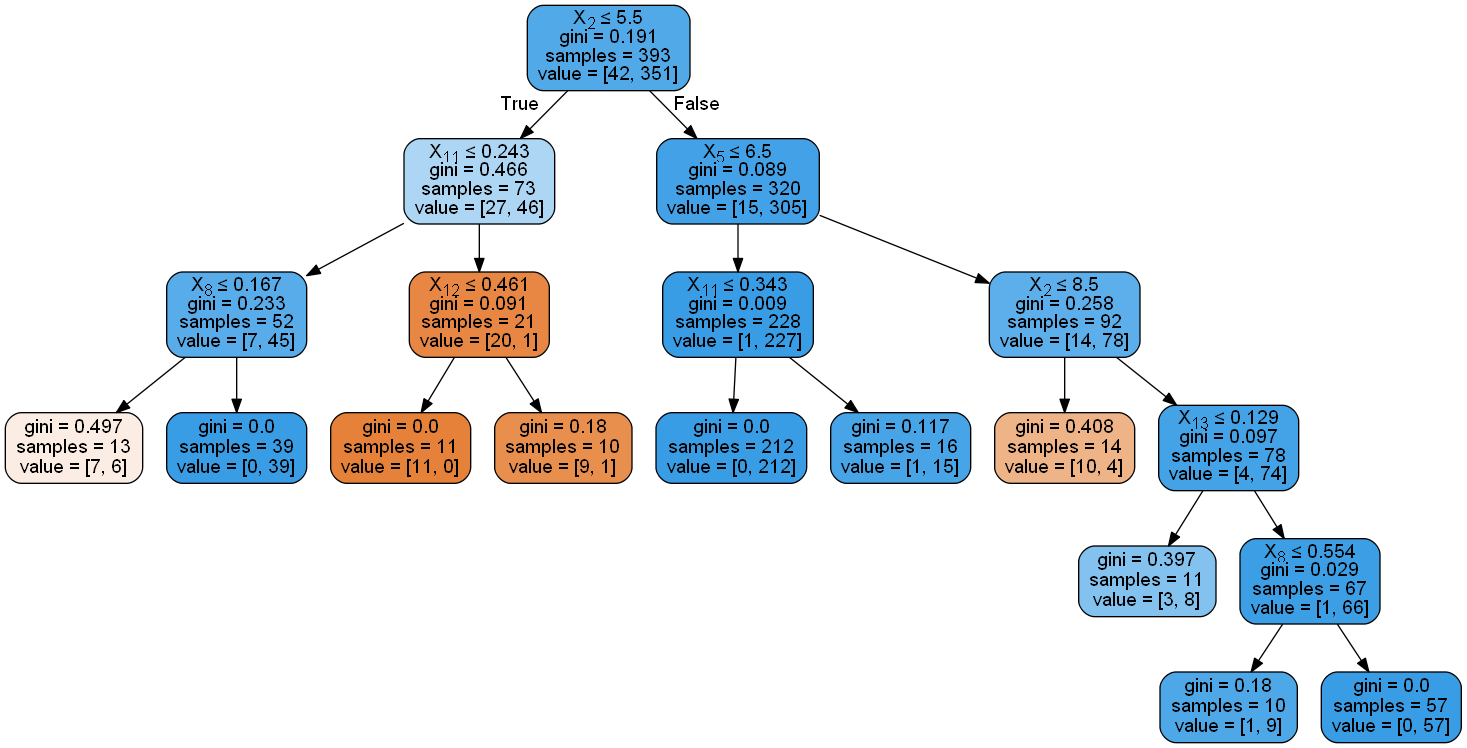

In [57]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [58]:
xtr = features[:100]
xte = features[100:]
ytr = target[:100]
yte = target[100:]

In [59]:
model2=DecisionTreeClassifier()
model2.fit(xtr,ytr)
Prediction=model2.predict(xte)

In [60]:
Prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [62]:
yte

,SuccessRate
100,1
101,0
102,0
103,0
104,0
105,0
106,0
107,0
108,0
109,0


In [23]:
print("Trained Score")
print(confusion_matrix(yte,Prediction))
print(classification_report(yte,Prediction))

Trained Score
[[  3  66]
 [  7 412]]
             precision    recall  f1-score   support

          0       0.30      0.04      0.08        69
          1       0.86      0.98      0.92       419

avg / total       0.78      0.85      0.80       488



In [24]:
#Random Forest

In [26]:
tree=RandomForestClassifier()
model3=tree.fit(xtr,ytr)

C:\Users\hasot\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [27]:
Prediction2=model3.predict(xte)

In [28]:
Prediction2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [29]:
yte

,SuccessRate
100,1
101,0
102,0
103,0
104,0
105,0
106,0
107,0
108,0
109,0


In [30]:
print("Real Values", str(yte.values))
print("Estimated Values", str(Prediction2))

Real Values [[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1

In [31]:
print("Error:" , str(np.mean(yte.values!=Prediction2)))

Error: 0.147272238646


In [32]:
print(accuracy_score(yte, Prediction2))

0.850409836066
